# Mental Health & Lifestyle — Data Analysis and Predictive Modeling

**Authors:** Patel Nishit, Pranav Adhikari, Pragun Lal Shrestha, Unique Bhakta Shrestha  
**Course / Year:** B.Sc (Hons) Computer Science — 2nd Year  
**Project Domain:** Data Analytics & Machine Learning  
**Project Components:** Exploratory Data Analysis (EDA), Data Preprocessing, Classification Modeling, Model Evaluation, Insights & Conclusions.

## Problem Statement

The goal of this project is to **identify key lifestyle and psychological factors associated with mental health conditions** and to **build a predictive model** that can classify whether an individual is likely to experience mental health issues based on their self-reported habits, emotions, and history.

Specifically, we aim to:

1. Perform **Exploratory Data Analysis (EDA)** to identify patterns and trends in behavioral and emotional indicators.
2. Preprocess categorical variables using appropriate encoding techniques.
3. Develop and evaluate **classification models** to predict *treatment likelihood / mental health condition status*.
4. Compare model performance using metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
5. Interpret feature importance to understand the most influential contributing factors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
)


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Mental Health dataset1.csv")
print("Shape:", df.shape)
df.head()

Shape: (261328, 17)


,Gender,Country,Occupation,SelfEmployed,FamilyHistory,Treatment,DaysIndoors,HabitsChange,MentalHealthHistory,IncreasingStress,MoodSwings,SocialWeakness,CopingStruggles,WorkInterest,SocialWeakness.1,MentalHealthInterview,CareOptions
0,Female,UK,Others,No,Yes,No,15-30 days,No,Yes,Yes,High,No,Yes,Maybe,No,No,No
1,Female,USA,Housewife,No,Yes,No,15-30 days,Maybe,Maybe,Yes,High,Maybe,Yes,Maybe,Maybe,No,Not sure
2,Female,Canada,Others,No,No,Yes,More than 2 months,Maybe,No,No,Medium,No,No,No,No,No,Not sure
3,Female,Canada,Corporate,No,Yes,Yes,Go out Every day,No,Maybe,No,Medium,No,No,Maybe,No,No,Not sure
4,Female,UK,Corporate,No,No,Yes,More than 2 months,Yes,No,Maybe,Medium,Maybe,No,Maybe,Maybe,No,Not sure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261328 entries, 0 to 261327
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Gender                 261328 non-null  object
 1   Country                261328 non-null  object
 2   Occupation             261328 non-null  object
 3   SelfEmployed           256972 non-null  object
 4   FamilyHistory          261328 non-null  object
 5   Treatment              261328 non-null  object
 6   DaysIndoors            261328 non-null  object
 7   HabitsChange           261328 non-null  object
 8   MentalHealthHistory    261328 non-null  object
 9   IncreasingStress       261328 non-null  object
 10  MoodSwings             261328 non-null  object
 11  SocialWeakness         261328 non-null  object
 12  CopingStruggles        261328 non-null  object
 13  WorkInterest           261328 non-null  object
 14  SocialWeakness.1       261328 non-null  object
 15  

In [5]:
df.isnull().sum()

Gender                      0
Country                     0
Occupation                  0
SelfEmployed             4356
FamilyHistory               0
Treatment                   0
DaysIndoors                 0
HabitsChange                0
MentalHealthHistory         0
IncreasingStress            0
MoodSwings                  0
SocialWeakness              0
CopingStruggles             0
WorkInterest                0
SocialWeakness.1            0
MentalHealthInterview       0
CareOptions                 0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(175284)

In [7]:
df.nunique()

Gender                    2
Country                  35
Occupation                5
SelfEmployed              2
FamilyHistory             2
Treatment                 2
DaysIndoors               5
HabitsChange              3
MentalHealthHistory       3
IncreasingStress          3
MoodSwings                3
SocialWeakness            3
CopingStruggles           2
WorkInterest              3
SocialWeakness.1          3
MentalHealthInterview     3
CareOptions               3
dtype: int64

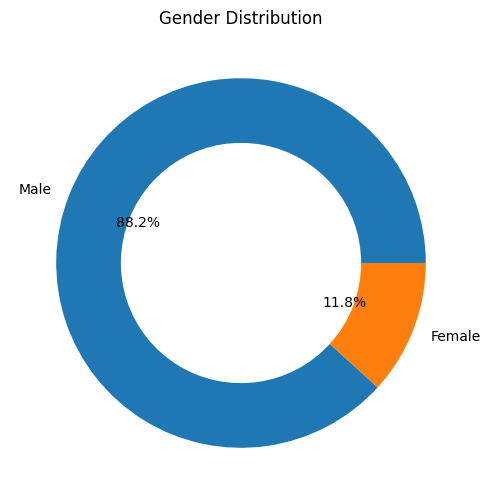

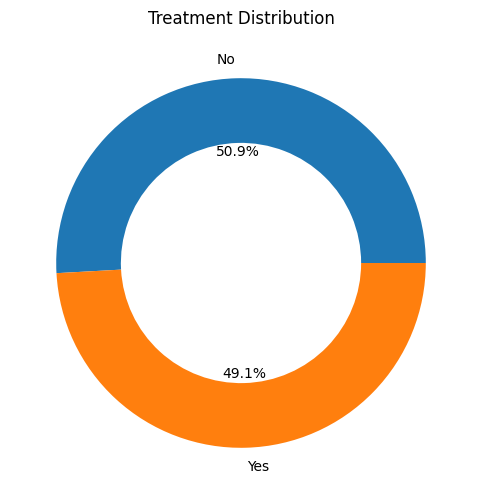

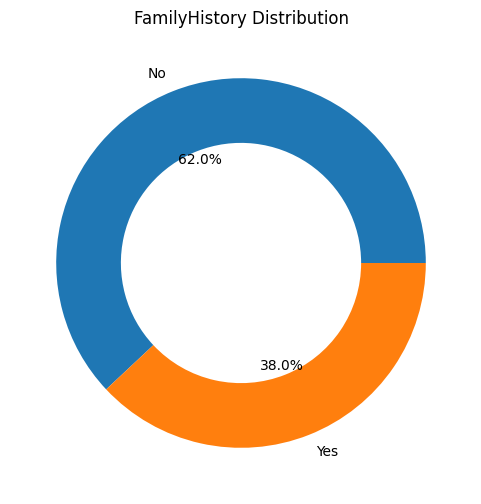

In [10]:

def donut(col):
    counts = df[col].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', wedgeprops={'width':0.35})
    plt.title(f"{col} Distribution")
    plt.show()

# Example
donut('Gender')
donut('Treatment')
donut('FamilyHistory')


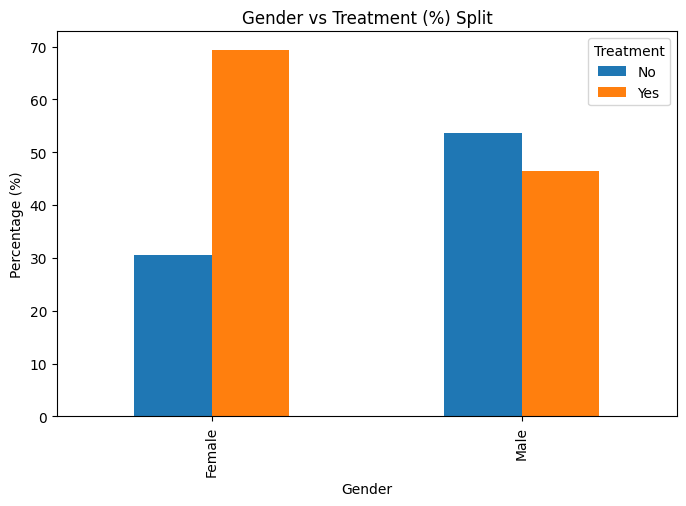

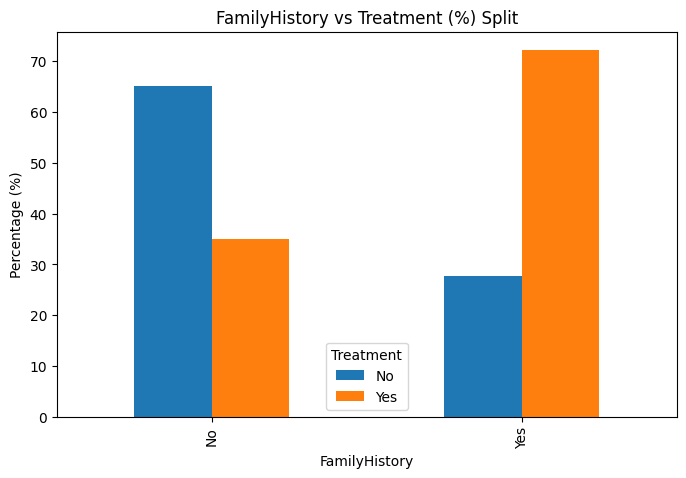

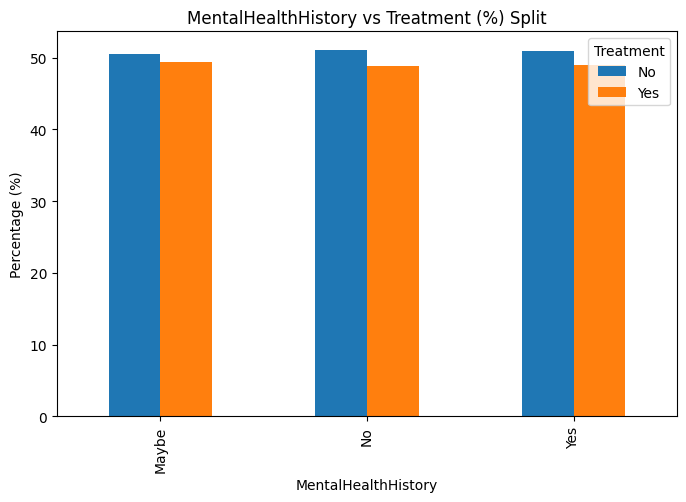

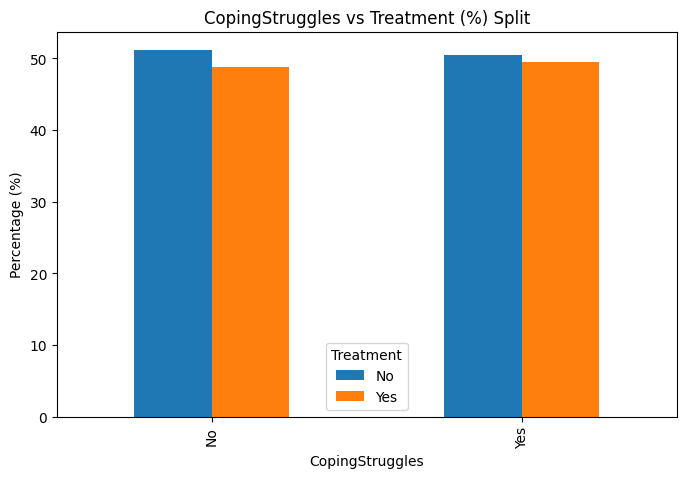

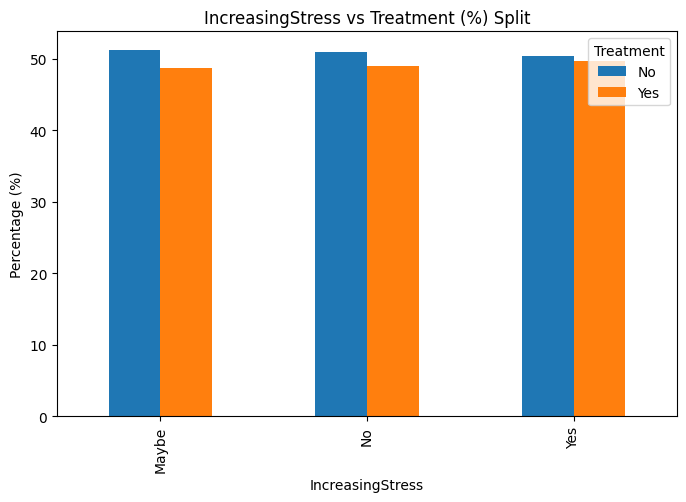

In [11]:
def stacked(col):
    tab = pd.crosstab(df[col], df['Treatment'], normalize='index') * 100
    tab.plot(kind='bar', figsize=(8,5))
    plt.ylabel("Percentage (%)")
    plt.title(f"{col} vs Treatment (%) Split")
    plt.legend(title="Treatment")
    plt.show()

stacked('Gender')
stacked('FamilyHistory')
stacked('MentalHealthHistory')
stacked('CopingStruggles')
stacked('IncreasingStress')


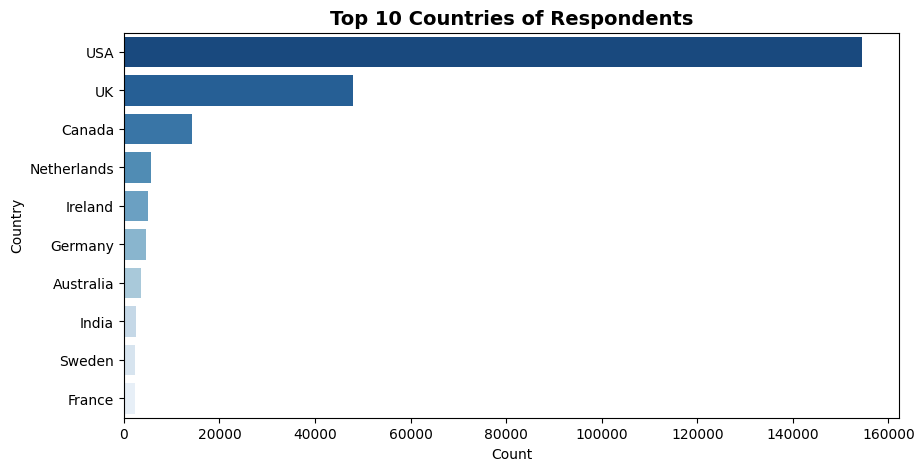

In [10]:
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries of Respondents', fontsize=14, weight='bold')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

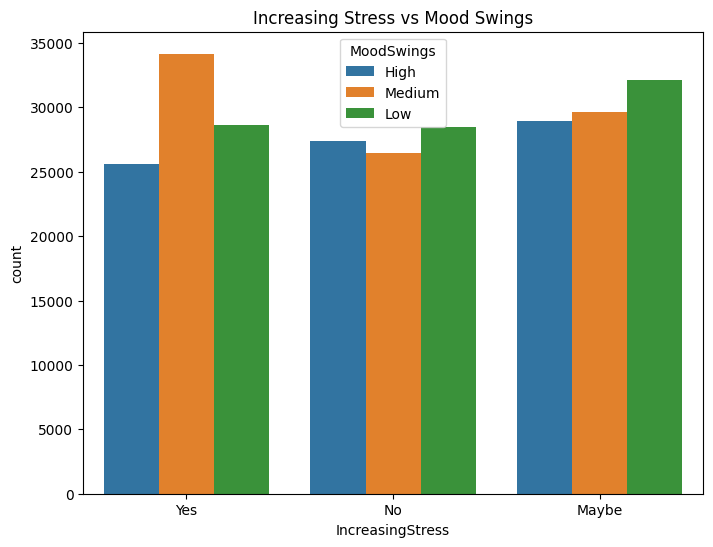

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='IncreasingStress', hue='MoodSwings')
plt.title("Increasing Stress vs Mood Swings")
plt.show()


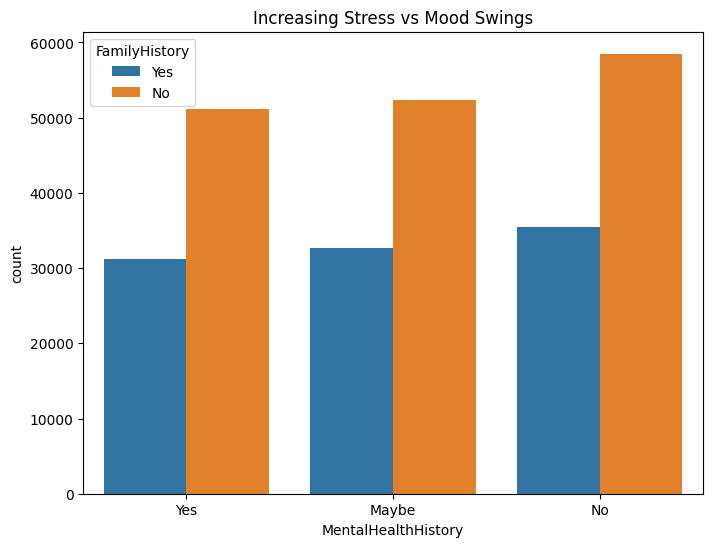

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='MentalHealthHistory', hue='FamilyHistory')
plt.title("Increasing Stress vs Mood Swings")
plt.show()

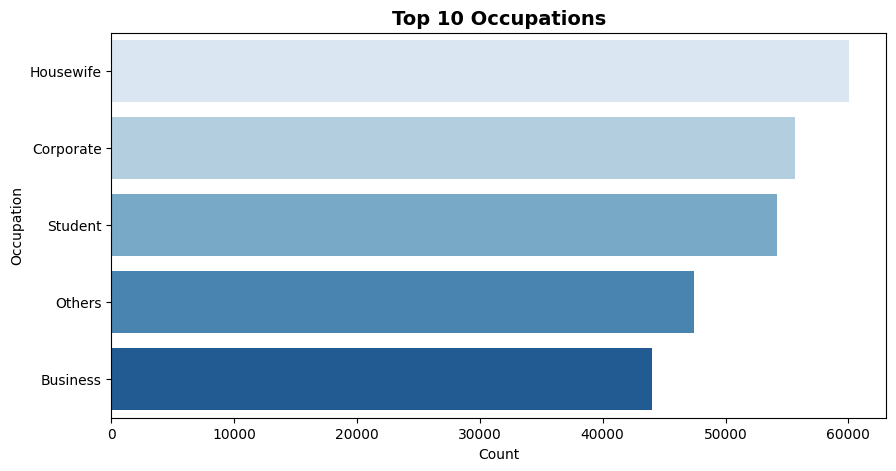

In [11]:
plt.figure(figsize=(10, 5))
top_occ = df['Occupation'].value_counts().nlargest(10)
sns.barplot(x=top_occ.values, y=top_occ.index, palette='Blues')
plt.title('Top 10 Occupations', fontsize=14, weight='bold')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

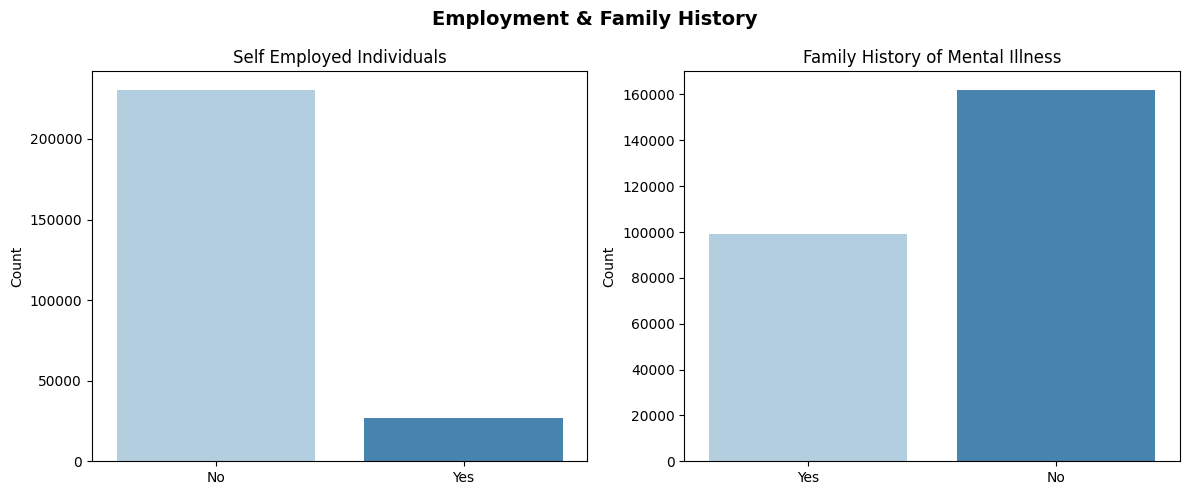

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='SelfEmployed', data=df, ax=ax[0], palette='Blues')
sns.countplot(x='FamilyHistory', data=df, ax=ax[1], palette='Blues')
ax[0].set_title('Self Employed Individuals')
ax[1].set_title('Family History of Mental Illness')
for a in ax:
    a.set_xlabel('')
    a.set_ylabel('Count')
plt.suptitle('Employment & Family History', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

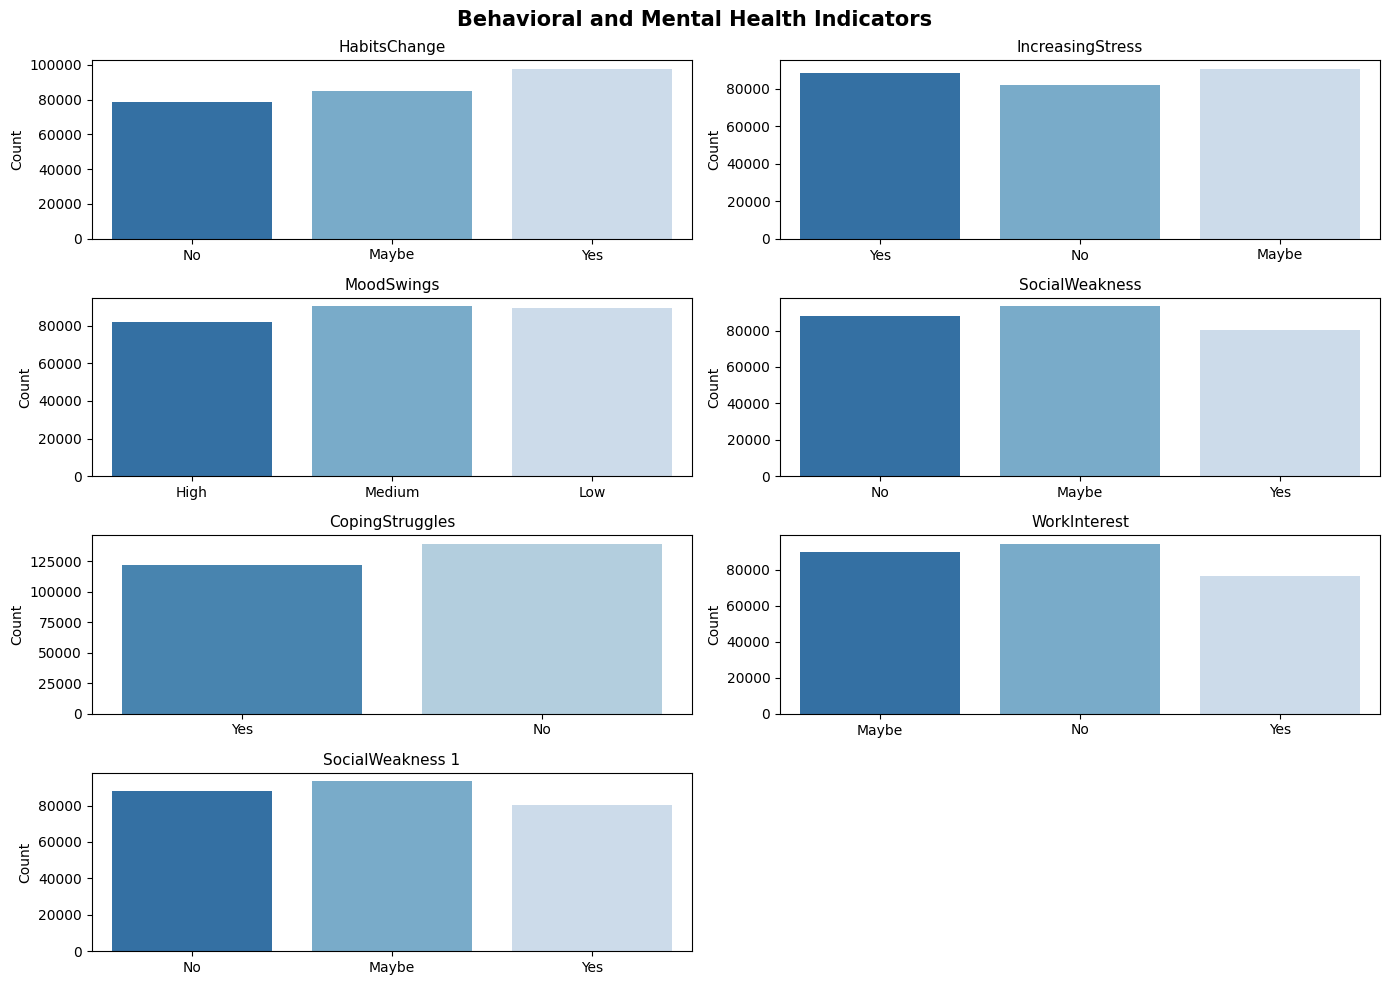

In [14]:
cols = ['HabitsChange', 'IncreasingStress', 'MoodSwings', 'SocialWeakness',
        'CopingStruggles', 'WorkInterest', 'SocialWeakness.1']

plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df, palette='Blues_r')
    plt.title(col.replace('.', ' '), fontsize=11)
    plt.xlabel('')
    plt.ylabel('Count')
plt.suptitle('Behavioral and Mental Health Indicators', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

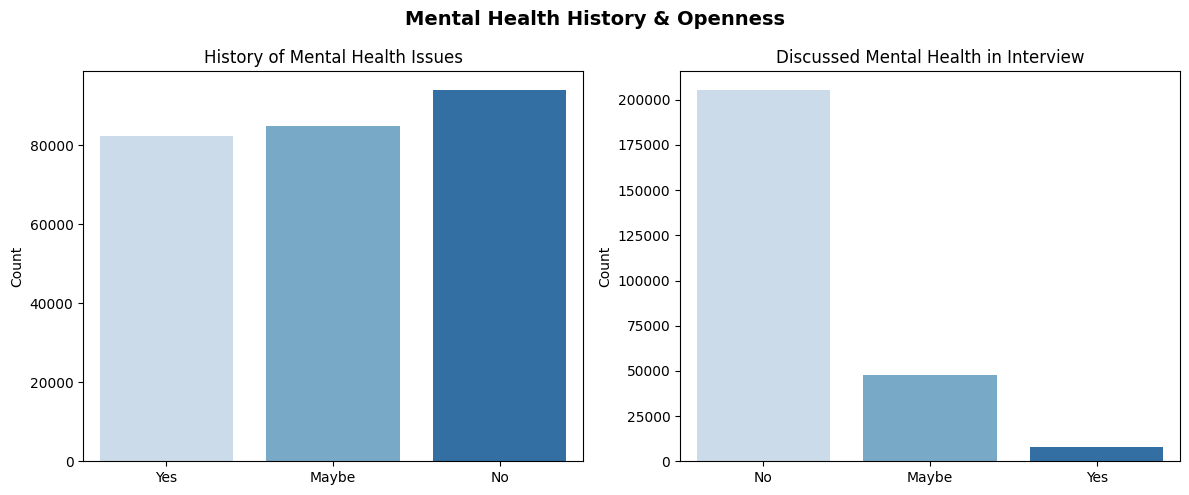

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='MentalHealthHistory', data=df, ax=ax[0], palette='Blues')
sns.countplot(x='MentalHealthInterview', data=df, ax=ax[1], palette='Blues')
ax[0].set_title('History of Mental Health Issues')
ax[1].set_title('Discussed Mental Health in Interview')
for a in ax:
    a.set_xlabel('')
    a.set_ylabel('Count')
plt.suptitle('Mental Health History & Openness', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# ---- Clean column names ----
df.columns = [c.strip() for c in df.columns]

# ---- Normalize Gender ----
def normalize_gender(x):
    if pd.isna(x): return "Other"
    s = str(x).lower().strip()
    if "male" in s or s == "m": return "Male"
    if "female" in s or s == "f": return "Female"
    if "trans" in s: return "Trans"
    if "non" in s or "nb" in s: return "Non-binary"
    return "Other"

df["Gender_clean"] = df["Gender"].apply(normalize_gender)

# ---- Reduce high-cardinality: Country & Occupation ----
top_countries = df["Country"].value_counts().nlargest(10).index
df["Country_group"] = df["Country"].apply(lambda c: c if c in top_countries else "Other")

top_jobs = df["Occupation"].value_counts().nlargest(10).index
df["Occupation_group"] = df["Occupation"].apply(lambda c: c if c in top_jobs else "Other")

# ---- Handle Self Employed missing values ----
df["SelfEmployed"] = df["SelfEmployed"].fillna("Unknown")

# ---- Drop duplicate if exists ----
if "SocialWeakness.1" in df.columns:
    df.drop(columns=["SocialWeakness.1"], inplace=True)

# ---- Target Encoding ----
df["Treatment"] = df["Treatment"].astype(str).str.capitalize()
df["target"] = df["Treatment"].apply(lambda x: 1 if x=="Yes" else 0)

print("\nProcessed Shape:", df.shape)

# ---- Select Features ----
features = [
    "Gender_clean","Country_group","Occupation_group","SelfEmployed","FamilyHistory",
    "DaysIndoors","HabitsChange","MentalHealthHistory","IncreasingStress",
    "MoodSwings","CopingStruggles","WorkInterest","MentalHealthInterview","CareOptions"
]

X = df[features].copy()
y = df["target"].copy()

# ---- One Hot Encoding ----
X = pd.get_dummies(X, drop_first=True)
print("\nEncoded Feature Matrix:", X.shape)

# ---- Train-Test Split ----
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain:", X_train.shape, " Test:", X_test.shape)



Processed Shape: (261328, 20)

Encoded Feature Matrix: (261328, 36)

Train: (209062, 36)  Test: (52266, 36)


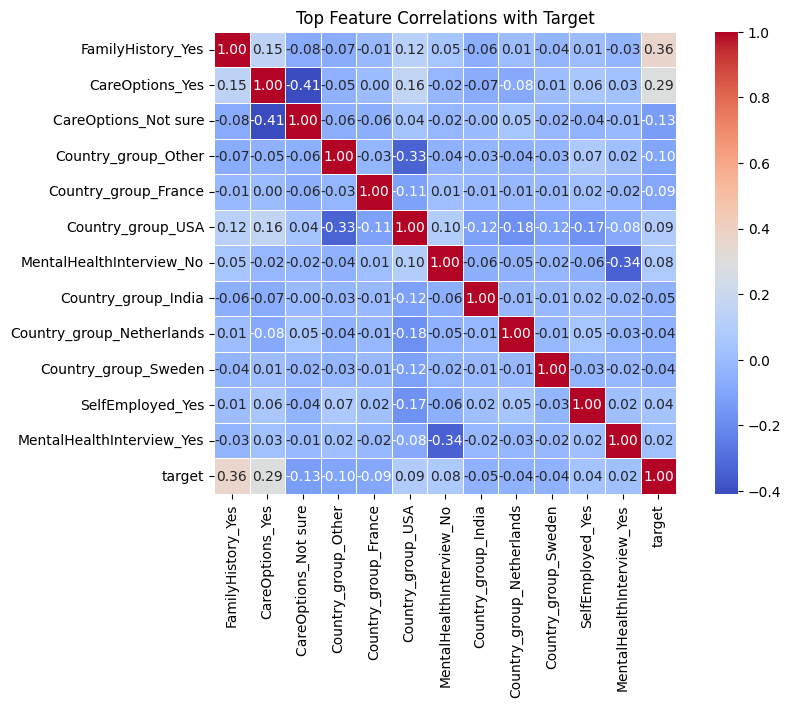

In [ ]:
corr_matrix = pd.concat([X, y], axis=1).corr()

target_corr = corr_matrix["target"].drop("target")

top_features = target_corr.abs().sort_values(ascending=False).head(12).index

heatmap_features = list(top_features) + ["target"]
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[heatmap_features, heatmap_features],
            annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5, square=True)
plt.title("Top Feature Correlations with Target")
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=800, class_weight="balanced", solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42, n_jobs=-1)
}

for name, model in models.items():
    if "Logistic" in name:
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

In [18]:
def evaluate(model, X, y, scaled=False):
    X_eval = scaler.transform(X) if scaled else X
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)[:, 1]
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, pos_label=1),
        "Recall": recall_score(y, y_pred, pos_label=1),
        "F1": f1_score(y, y_pred, pos_label=1),
        "ROC_AUC": roc_auc_score(y, y_prob)
    }

results = {}
for name, model in models.items():
    scaled = True if "Logistic" in name else False
    results[name] = evaluate(model, X_test, y_test, scaled=scaled)

results_df = pd.DataFrame(results).T.sort_values("F1", ascending=False)
print("Model Comparison:\n")
print(results_df)

Model Comparison:

                     Accuracy  Precision    Recall        F1   ROC_AUC
Decision Tree        0.731451   0.704405  0.781063  0.740756  0.780172
Random Forest        0.729671   0.708567  0.763847  0.735169  0.790061
Logistic Regression  0.704339   0.694072  0.711888  0.702867  0.771253


In [19]:
best_model_name = results_df["F1"].idxmax()
best_model = models[best_model_name]
print(f" Best Model: {best_model_name}")

print("\nClassification Report:\n")
if "Logistic" in best_model_name:
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

 Best Model: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.68      0.72     26592
           1       0.70      0.78      0.74     25674

    accuracy                           0.73     52266
   macro avg       0.73      0.73      0.73     52266
weighted avg       0.73      0.73      0.73     52266



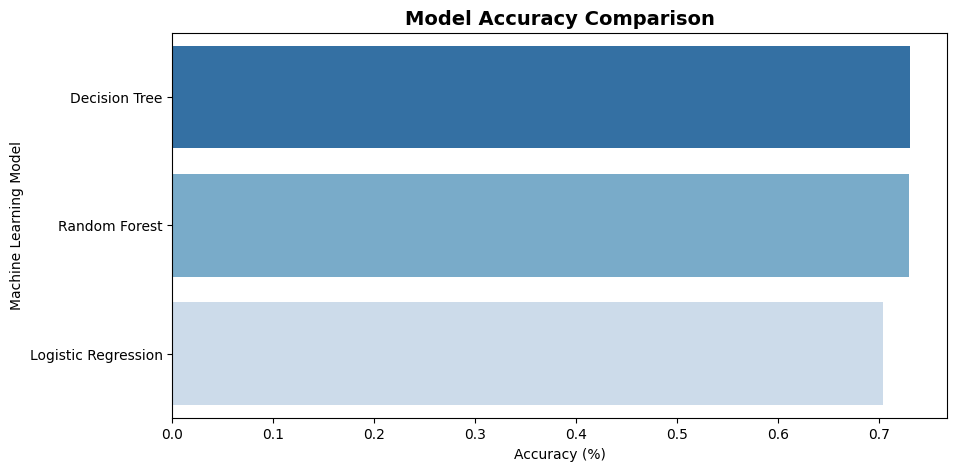

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y=results_df.index, data=results_df, palette='Blues_r')
plt.title('Model Accuracy Comparison', fontsize=14, weight='bold')
plt.xlabel('Accuracy (%)')
plt.ylabel('Machine Learning Model')
plt.show()

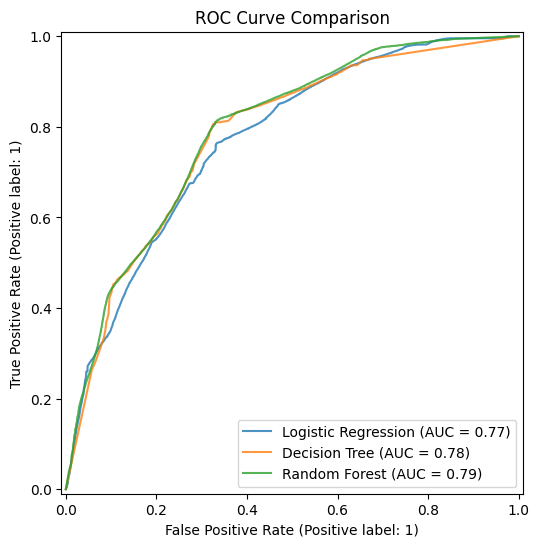

In [21]:
plt.figure(figsize=(8, 6))
for name, model in models.items():
    scaled = True if "Logistic" in name else False
    RocCurveDisplay.from_estimator(
        model, scaler.transform(X_test) if scaled else X_test,
        y_test, name=name, ax=plt.gca(), alpha=0.8
    )
plt.title("ROC Curve Comparison")
plt.show()

## Key Takeaways

1. **Mental health conditions are influenced by multiple personal and environmental factors**, rather than a single variable. Patterns across stress, coping ability, mood swings, and family history show interconnected effects.

2. **Individuals with a prior mental health history or family history were significantly more likely to seek treatment.** This suggests awareness and past exposure play a major role in encouraging help-seeking behavior.

3. **Increasing stress and difficulty coping showed a strong association with the likelihood of requiring mental health support.** This highlights stress management as a critical prevention intervention point.

4. **Most demographic variables (such as gender) did not show as strong an influence as psychological and lifestyle factors.** This implies mental health challenges are more universally experienced across groups.

5. **Stacked percentage visualizations helped clarify the proportion of treatment vs. non-treatment cases in each category**, making it easier to interpret behavioral trends rather than raw frequencies.

6. **Cramér’s V association analysis provided a meaningful alternative to correlation** since the dataset was primarily categorical. This approach allowed us to measure relationship strength between non-numeric features.

7. **The ML models helped identify patterns but should not be used for clinical diagnosis.** Predictions can guide awareness and screening, but professional assessment is necessary for treatment decisions.

---

## Final Conclusion

This project demonstrates that **psychological stressors and historical exposure are key indicators of mental health treatment behavior**, while demographic factors play a comparatively smaller role. Effective mental health support should therefore prioritize:
- Increasing awareness and destigmatization
- Early stress coping training
- Accessible counseling resources
